# Forecasting of Exports Data

## Visualisation of Data

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


df = pd.read_csv('data/Handel.csv', sep=';',)
df

,Jahr,Monat,Land,Ausfuhr: Gewicht in t,t,Veränderung zum Vorjahresmonat (%),Veränderung zum Vorjahresmonat (%).1,Ausfuhr: Wert Tsd. EUR,Tsd. EUR,Veränderung zum Vorjahresmonat (%).2,...,Veränderung zum Vorjahresmonat (%).6,Veränderung zum Vorjahresmonat (%).7,Einfuhr Weert Tsd. EUR,Tsd. EUR.1,Veränderung zum Vorjahresmonat (%).8,Veränderung zum Vorjahresmonat (%).9,Einfuhr: Wert Tsd. US $,Tsd. US $.1,Veränderung zum Vorjahresmonat (%).10,Veränderung zum Vorjahresmonat (%).11
0,2000,Januar,Vereinigte Staaten von Amerika,"695756,2",e,.,NaN,4040020,e,.,...,.,NaN,3250132,e,.,NaN,-,NaN,.,NaN
1,2000,Februar,Vereinigte Staaten von Amerika,"895496,8",e,.,NaN,4948739,e,.,...,.,NaN,3255753,e,.,NaN,-,NaN,.,NaN
2,2000,März,Vereinigte Staaten von Amerika,"903695,2",e,.,NaN,5606604,e,.,...,.,NaN,4270195,e,.,NaN,-,NaN,.,NaN
3,2000,April,Vereinigte Staaten von Amerika,"681745,4",e,.,NaN,4344320,e,.,...,.,NaN,3588842,e,.,NaN,-,NaN,.,NaN
4,2000,Mai,Vereinigte Staaten von Amerika,"883898,8",e,.,NaN,5586358,e,.,...,.,NaN,4305312,e,.,NaN,-,NaN,.,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2024,August,Vereinigte Staaten von Amerika,"728202,9",p,"-7,5",p,12645859,p,"-3,2",...,"0,9",p,7900486,p,"-1,1",p,8700016,p,"-0,2",p
296,2024,September,Vereinigte Staaten von Amerika,868611,p,"1,5",p,14605935,p,"10,5",...,"0,3",p,7556107,p,"0,8",p,8391813,p,"4,7",p
297,2024,Oktober,Vereinigte Staaten von Amerika,"827407,3",p,"-2,5",p,13360210,p,"-6,8",...,"-0,9",p,7819621,p,"-1,9",p,8526514,p,"1,2",p
298,2024,November,Vereinigte Staaten von Amerika,"798463,7",p,"-7,4",p,14320863,p,1,...,"-8,8",p,7369423,p,"-11,4",p,7833697,p,"-12,9",p


### Data Preparation

In [84]:
# Map German month names to their respective numbers
month_mapping = {
    'Januar': 1, 'Februar': 2, 'März': 3, 'April': 4, 'Mai': 5, 'Juni': 6,
    'Juli': 7, 'August': 8, 'September': 9, 'Oktober': 10, 'November': 11, 'Dezember': 12
}

# Add a new column 'Date' by combining 'Jahr' and 'Monat'
df['Date'] = pd.to_datetime(df['Jahr'].astype(str) + '-' + df['Monat'].map(month_mapping).astype(str) + '-01')

# Rename columns for clarity
df.rename(columns={'Ausfuhr: Wert Tsd. EUR': 'value_Outgoing'}, inplace=True)

#Delete unnecessary columns

df['Monate_seit_start'] = (df['Date'].dt.year - df['Date'].dt.year.min()) * 12 + df['Date'].dt.month - df['Date'].dt.month.min()
df

,Jahr,Monat,Land,Ausfuhr: Gewicht in t,t,Veränderung zum Vorjahresmonat (%),Veränderung zum Vorjahresmonat (%).1,value_Outgoing,Tsd. EUR,Veränderung zum Vorjahresmonat (%).2,...,Einfuhr Weert Tsd. EUR,Tsd. EUR.1,Veränderung zum Vorjahresmonat (%).8,Veränderung zum Vorjahresmonat (%).9,Einfuhr: Wert Tsd. US $,Tsd. US $.1,Veränderung zum Vorjahresmonat (%).10,Veränderung zum Vorjahresmonat (%).11,Date,Monate_seit_start
0,2000,Januar,Vereinigte Staaten von Amerika,"695756,2",e,.,NaN,4040020,e,.,...,3250132,e,.,NaN,-,NaN,.,NaN,2000-01-01,0
1,2000,Februar,Vereinigte Staaten von Amerika,"895496,8",e,.,NaN,4948739,e,.,...,3255753,e,.,NaN,-,NaN,.,NaN,2000-02-01,1
2,2000,März,Vereinigte Staaten von Amerika,"903695,2",e,.,NaN,5606604,e,.,...,4270195,e,.,NaN,-,NaN,.,NaN,2000-03-01,2
3,2000,April,Vereinigte Staaten von Amerika,"681745,4",e,.,NaN,4344320,e,.,...,3588842,e,.,NaN,-,NaN,.,NaN,2000-04-01,3
4,2000,Mai,Vereinigte Staaten von Amerika,"883898,8",e,.,NaN,5586358,e,.,...,4305312,e,.,NaN,-,NaN,.,NaN,2000-05-01,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2024,August,Vereinigte Staaten von Amerika,"728202,9",p,"-7,5",p,12645859,p,"-3,2",...,7900486,p,"-1,1",p,8700016,p,"-0,2",p,2024-08-01,295
296,2024,September,Vereinigte Staaten von Amerika,868611,p,"1,5",p,14605935,p,"10,5",...,7556107,p,"0,8",p,8391813,p,"4,7",p,2024-09-01,296
297,2024,Oktober,Vereinigte Staaten von Amerika,"827407,3",p,"-2,5",p,13360210,p,"-6,8",...,7819621,p,"-1,9",p,8526514,p,"1,2",p,2024-10-01,297
298,2024,November,Vereinigte Staaten von Amerika,"798463,7",p,"-7,4",p,14320863,p,1,...,7369423,p,"-11,4",p,7833697,p,"-12,9",p,2024-11-01,298


## Linear Regression

### Simple Linear Regression

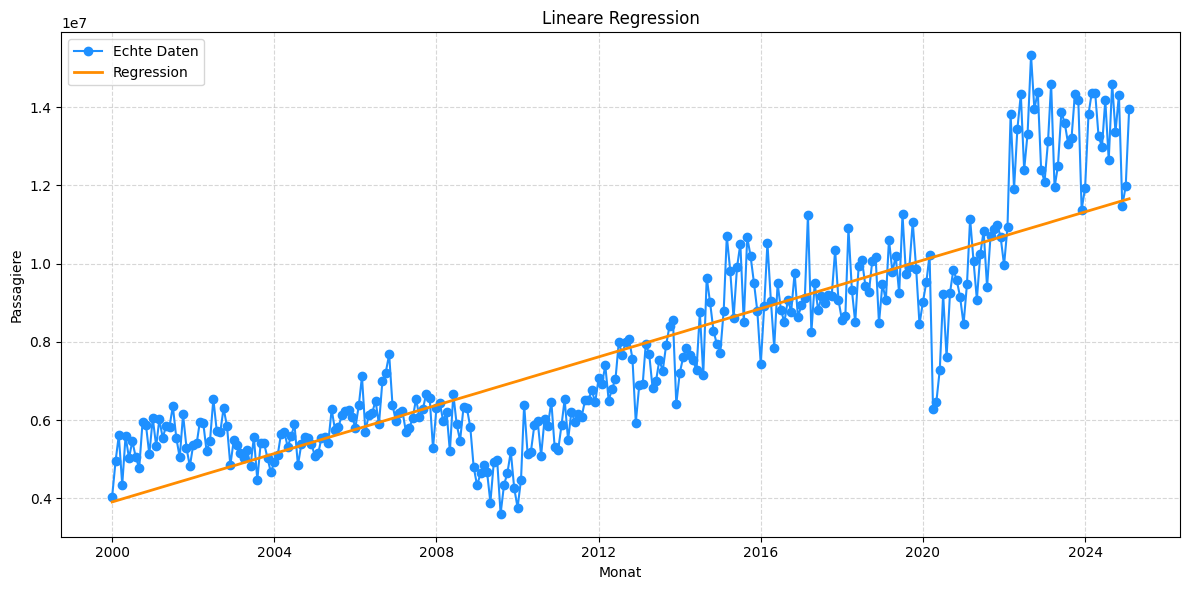

Mean Absolute Percentage Error (MAPE): 14.11%
Mean Absolute Deviation (MAD): 1963294.44


In [3]:


#Datensatz gessamt
X_all = df[['Monate_seit_start']]
y_all = df['value_Outgoing']

#Datensatz Training (Alle Monate bis auf die letzten 12)
X_train = df.iloc[:-12][['Monate_seit_start']]
y_train = df.iloc[:-12]['value_Outgoing']

#Datensatz Validierung (Letzten 12 Monate)
X_valid = df.iloc[-12:][['Monate_seit_start']]
y_valid = df.iloc[-12:]['value_Outgoing']

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_all)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], y_all, label='Echte Daten', marker='o', color='dodgerblue')
plt.plot(df['Date'], y_pred, label='Regression', color='darkorange', linewidth=2)
plt.xlabel('Monat')
plt.ylabel('Passagiere')
plt.title('Lineare Regression')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Calculate Mean Absolute Percentage Error (MAPE) oonn the validation set
mape = np.mean(np.abs((y_valid - y_pred[-12:]) / y_valid)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Calculate Mean Absolute Deviation (MAD) on the validation set
mad = np.mean(np.abs(y_valid - y_pred[-12:]))
print(f"Mean Absolute Deviation (MAD): {mad:.2f}")

### Linear Regression Saison

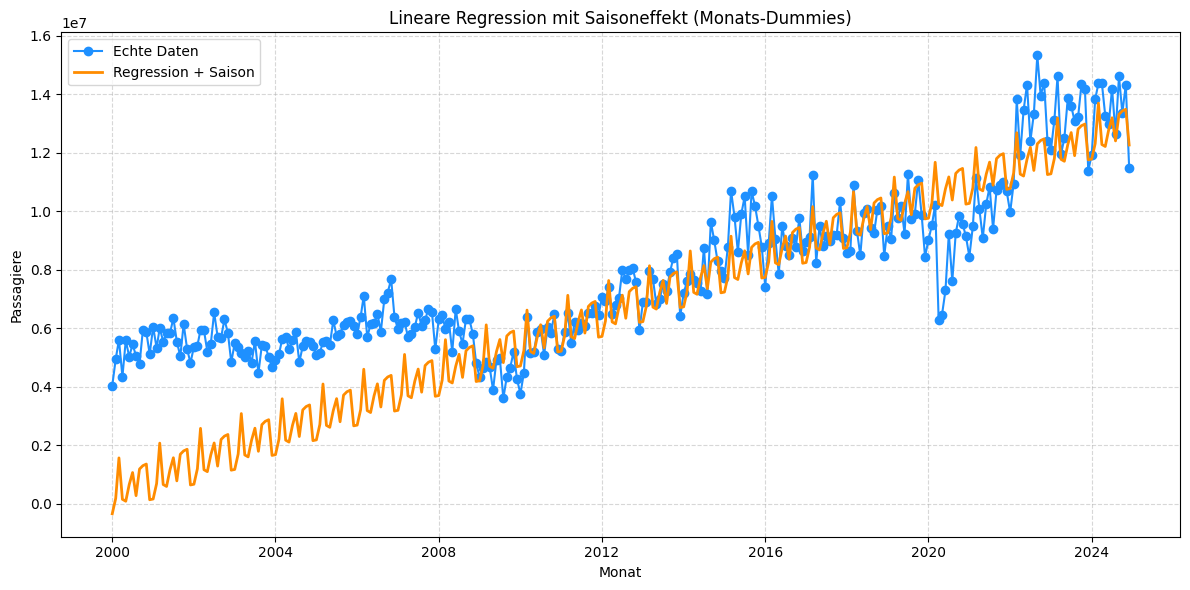

Mean Absolute Percentage Error (MAPE): 5.99%
Mean Absolute Deviation (MAD): 825041.45


In [89]:
df['Monat_num'] = df['Date'].dt.month
dummies = pd.get_dummies(df['Monat_num'], prefix='Monat', drop_first=True)  # Drop First = Referenzmonat

# Features zusammenstellen
X_all = pd.concat([df[['Monate_seit_start']], dummies], axis=1)
y_all = df['value_Outgoing']

# Split in Training (alles bis auf letzte 12 Monate) und Validierung (letzte 12 Monate)
X_train = X_all.iloc[:-12]
# Split in Training ud Validierung die ersten 120 Monate werden nicht verwendet
X_train = X_train[-180:]
y_train = y_all.iloc[:-12]
y_train = y_train[-180:]
X_valid = X_all.iloc[-12:]
y_valid = y_all.iloc[-12:]

# Modell trainieren
model = LinearRegression()
model.fit(X_train, y_train)

# Vorhersage über gesamten Zeitraum (für Plot) + Validierung
y_pred_all = model.predict(X_all)
y_pred_valid = model.predict(X_valid)

#print(y_pred_all[-12:])
#print(y_pred_valid)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], y_all, label='Echte Daten', marker='o', color='dodgerblue')
plt.plot(df['Date'], y_pred_all, label='Regression + Saison', color='darkorange', linewidth=2)
plt.xlabel('Monat')
plt.ylabel('Passagiere')
plt.title('Lineare Regression mit Saisoneffekt (Monats-Dummies)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Metriken auf dem Validierungsset
mape = np.mean(np.abs((y_valid - y_pred_valid) / y_valid)) * 100
mad = np.mean(np.abs(y_valid - y_pred_valid))

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Mean Absolute Deviation (MAD): {mad:.2f}")


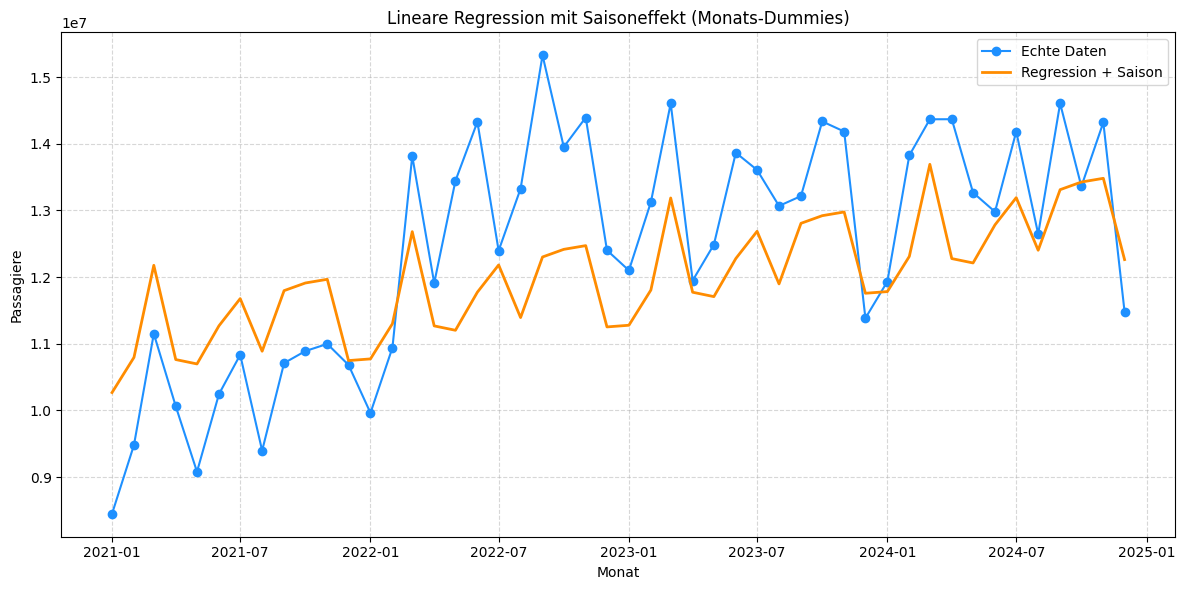

Mean Absolute Percentage Error (MAPE): 5.99%
Mean Absolute Deviation (MAD): 825041.45


In [88]:
df['Monat_num'] = df['Date'].dt.month
dummies = pd.get_dummies(df['Monat_num'], prefix='Monat', drop_first=True)  # Drop First = Referenzmonat

# Features zusammenstellen
X_all = pd.concat([df[['Monate_seit_start']], dummies], axis=1)
y_all = df['value_Outgoing']

# Split in Training (alles bis auf letzte 12 Monate) und Validierung (letzte 12 Monate)
X_train = X_all.iloc[:-12]
# Split in Training ud Validierung die ersten 120 Monate werden nicht verwendet
X_train = X_train.iloc[-180:]
y_train = y_all.iloc[:-12]
y_train = y_train.iloc[-180:]
X_valid = X_all.iloc[-12:]
y_valid = y_all.iloc[-12:]

# 180: Mape = 5.71

# Modell trainieren
model = LinearRegression()
model.fit(X_train, y_train)

# Vorhersage über gesamten Zeitraum (für Plot) + Validierung
y_pred_all = model.predict(X_all)
y_pred_valid = model.predict(X_valid)

#print(y_pred_all[-12:])
#print(y_pred_valid)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'].iloc[-48:], y_all[-48:], label='Echte Daten', marker='o', color='dodgerblue')
plt.plot(df['Date'].iloc[-48:], y_pred_all[-48:], label='Regression + Saison', color='darkorange', linewidth=2)
plt.xlabel('Monat')
plt.ylabel('Passagiere')
plt.title('Lineare Regression mit Saisoneffekt (Monats-Dummies)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Metriken auf dem Validierungsset
mape = np.mean(np.abs((y_valid - y_pred_valid) / y_valid)) * 100
mad = np.mean(np.abs(y_valid - y_pred_valid))

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Mean Absolute Deviation (MAD): {mad:.2f}")


/Users/eliaspfeiffer/Developer/BI_Vorlesung/.venv/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


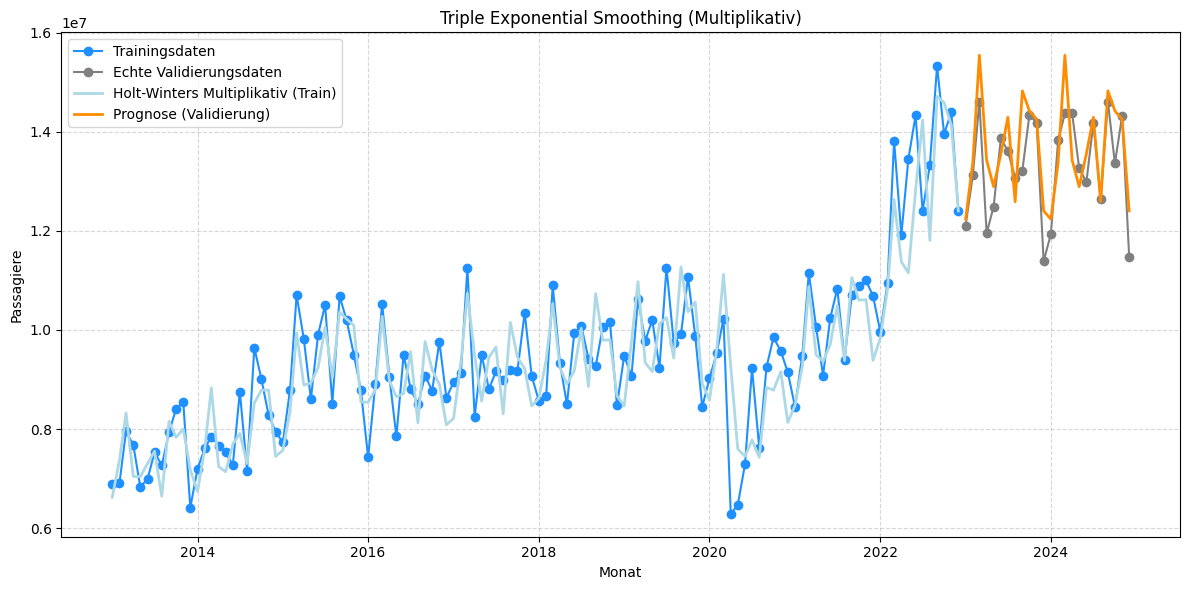

Mean Absolute Percentage Error (MAPE): 4.38%
Mean Absolute Deviation (MAD): 570956.44


 message: Inequality constraints incompatible
 success: False
  status: 4
     fun: 68490208636637.15
       x: [ 4.529e-01  1.000e-04 ...  1.044e+00  9.085e-01]
     nit: 1
     jac: [-1.702e+12  2.010e+13 ... -9.572e+12 -3.746e+13]
    nfev: 16
    njev: 1

In [92]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Zielvariable
y_all = df['value_Outgoing']




D_VALID = 24
D_TRAIN = 120

# Split: Letzte 12 Monate = Validierung
y_train = y_all.iloc[:-D_VALID]
y_train = y_train.iloc[-D_TRAIN:]
y_valid = y_all.iloc[-D_VALID:]
dates_train = df['Date'].iloc[:-D_VALID]
dates_train = dates_train.iloc[-D_TRAIN:]
dates_valid = df['Date'].iloc[-D_VALID:]

# Modell: Triple Exponential Smoothing (Holt-Winters, multiplikativ)
model = ExponentialSmoothing(
    y_train,
    trend=None,  # Additive Trendkomponente
    seasonal='multiplicative',  # Multiplikative Saisoneffekt 
    seasonal_periods=12,  # monatliche Daten mit Jahreszyklus
    initialization_method="estimated"  # Initialisierungsmethode
)
fit = model.fit()

# Vorhersagen
y_pred_train = fit.fittedvalues
y_pred_valid = fit.forecast(D_VALID)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(dates_train, y_train, label='Trainingsdaten', color='dodgerblue', marker='o')
plt.plot(dates_valid, y_valid, label='Echte Validierungsdaten', color='grey', marker='o')
plt.plot(dates_train, y_pred_train, label='Holt-Winters Multiplikativ (Train)', color='lightblue', linewidth=2)
plt.plot(dates_valid, y_pred_valid, label='Prognose (Validierung)', color='darkorange', linewidth=2)
plt.xlabel('Monat')
plt.ylabel('Passagiere')
plt.title('Triple Exponential Smoothing (Multiplikativ)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Evaluation auf Validierungsdaten
mape = np.mean(np.abs((y_valid - y_pred_valid) / y_valid)) * 100
mad = np.mean(np.abs(y_valid - y_pred_valid))

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Mean Absolute Deviation (MAD): {mad:.2f}")

fit.mle_retvals  # Gibt Details zum Optimierungsversuch zurück




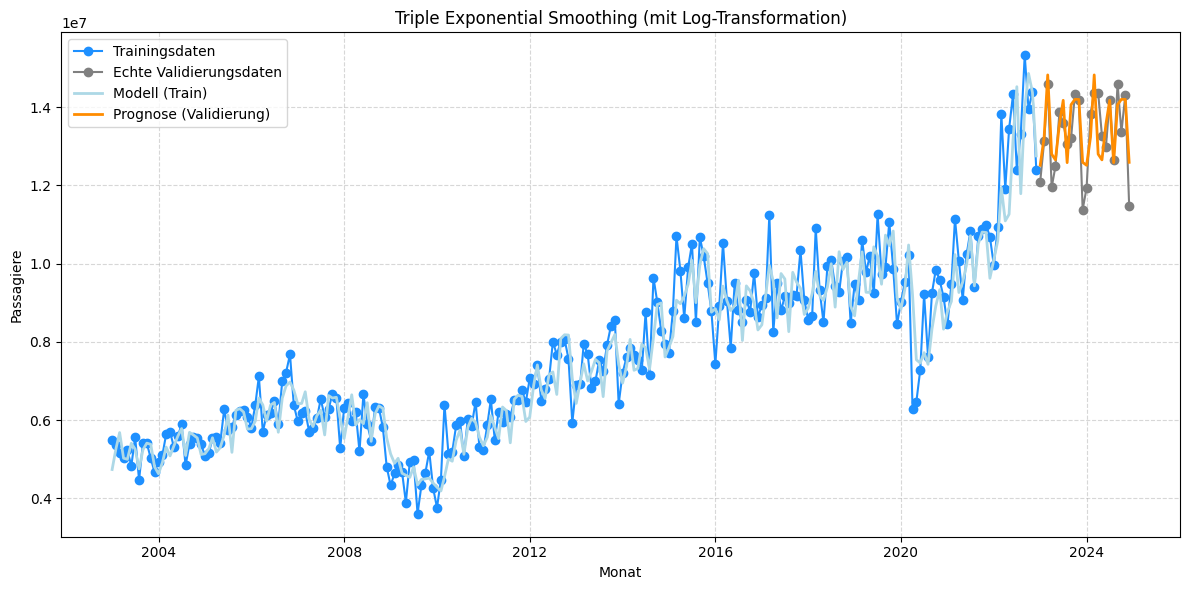

Mean Absolute Percentage Error (MAPE): 3.99%
Mean Absolute Deviation (MAD): 516,870
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 1.619435230042162
       x: [ 4.631e-01  5.897e-02]
     nit: 5
     jac: [ 1.472e-05  2.919e-05]
    nfev: 17
    njev: 5
{'smoothing_level': np.float64(0.4630781166741934), 'smoothing_trend': np.float64(nan), 'smoothing_seasonal': np.float64(0.05897451345340359), 'damping_trend': nan, 'initial_level': np.float64(15.431708109250767), 'initial_trend': np.float64(nan), 'initial_seasons': array([0.99604124, 0.99865906, 1.0029251 , 0.99795181, 0.99753166,
       1.00123363, 1.00281075, 0.99457705, 1.00281528, 1.00380495,
       1.00345486, 0.99819461]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Zielvariable + Log-Transformation
y_all = df['value_Outgoing']
y_all_log = np.log(y_all)  # Logarithmische Transformation

D_VALID = 24
D_TRAIN = 240

# Split
y_train_log = y_all_log.iloc[:-D_VALID].iloc[-D_TRAIN:]
y_valid_log = y_all_log.iloc[-D_VALID:]
dates_train = df['Date'].iloc[:-D_VALID].iloc[-D_TRAIN:]
dates_valid = df['Date'].iloc[-D_VALID:]

# Modell definieren (mit additiver Saison für log-Werte!)
model = ExponentialSmoothing(
    y_train_log,
    trend=None,  # Kein Trend hier — kannst auf 'add' setzen, falls sinnvoll
    seasonal='multiplicative',  # Achtung! Log-Transformation → 'add' für Saisonalität
    seasonal_periods=12,
    initialization_method="heuristic"  # Stabiler als 'estimated'
)

# Modell fitten
fit = model.fit()

# Vorhersagen (im Log-Raum)
y_pred_train_log = fit.fittedvalues
y_pred_valid_log = fit.forecast(D_VALID)

# Rücktransformation (Exponentiation)
y_train = np.exp(y_train_log)
y_valid = np.exp(y_valid_log)
y_pred_train = np.exp(y_pred_train_log)
y_pred_valid = np.exp(y_pred_valid_log)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(dates_train, y_train, label='Trainingsdaten', color='dodgerblue', marker='o')
plt.plot(dates_valid, y_valid, label='Echte Validierungsdaten', color='grey', marker='o')
plt.plot(dates_train, y_pred_train, label='Modell (Train)', color='lightblue', linewidth=2)
plt.plot(dates_valid, y_pred_valid, label='Prognose (Validierung)', color='darkorange', linewidth=2)
plt.xlabel('Monat')
plt.ylabel('Passagiere')
plt.title('Triple Exponential Smoothing (mit Log-Transformation)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Evaluation auf Originalskala
mape = np.mean(np.abs((y_valid - y_pred_valid) / y_valid)) * 100
mad = np.mean(np.abs(y_valid - y_pred_valid))

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Mean Absolute Deviation (MAD): {mad:,.0f}")

# Details zur Optimierung
print(fit.mle_retvals)
print(fit.params)


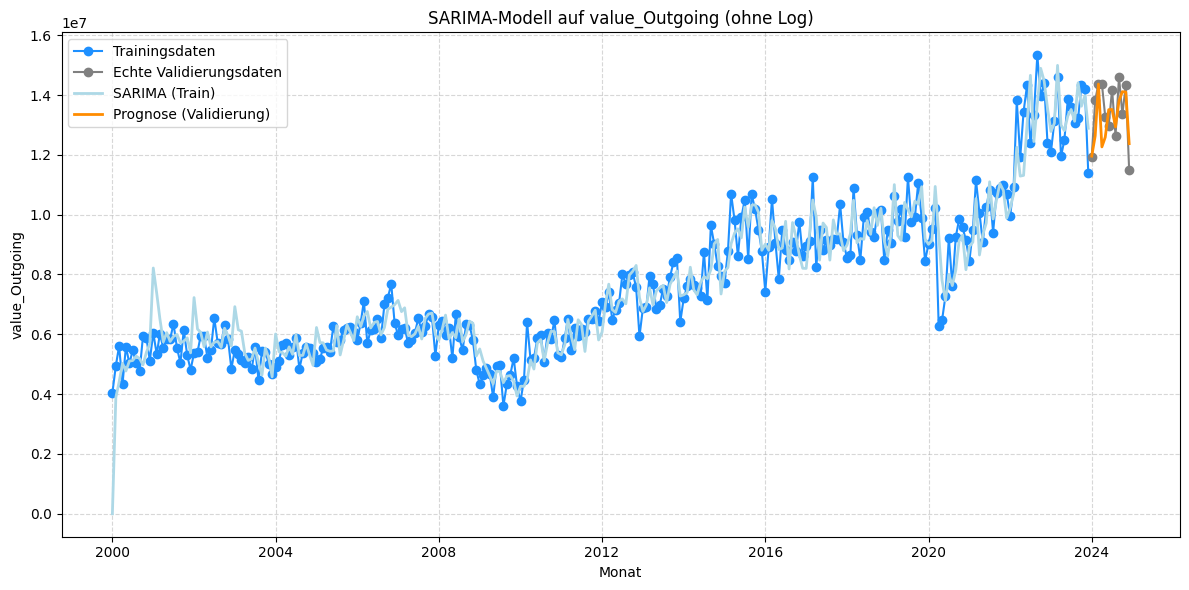

Mean Absolute Percentage Error (MAPE): 5.01%
Mean Absolute Deviation (MAD): 679,402
                                     SARIMAX Results                                      
Dep. Variable:                     value_Outgoing   No. Observations:                  288
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3885.096
Date:                            Tue, 22 Apr 2025   AIC                           7780.191
Time:                                    15:10:32   BIC                           7798.014
Sample:                                         0   HQIC                          7787.355
                                            - 288                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1120      0.1

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Zielvariable
y_all = df['value_Outgoing']

# Trainings- und Validierungsdaten
D_VALID = 12
y_train = y_all.iloc[:-D_VALID]
y_valid = y_all.iloc[-D_VALID:]
dates_train = df['Date'].iloc[:-D_VALID]
dates_valid = df['Date'].iloc[-D_VALID:]

# SARIMA-Modell definieren
model = SARIMAX(
    y_train,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

# Modell fitten
fit = model.fit(disp=False)

# Vorhersagen
y_pred_train = fit.fittedvalues
y_pred_valid = fit.forecast(steps=D_VALID)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(dates_train, y_train, label='Trainingsdaten', color='dodgerblue', marker='o')
plt.plot(dates_valid, y_valid, label='Echte Validierungsdaten', color='grey', marker='o')
plt.plot(dates_train, y_pred_train, label='SARIMA (Train)', color='lightblue', linewidth=2)
plt.plot(dates_valid, y_pred_valid, label='Prognose (Validierung)', color='darkorange', linewidth=2)
plt.xlabel('Monat')
plt.ylabel('value_Outgoing')
plt.title('SARIMA-Modell auf value_Outgoing (ohne Log)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Evaluation
mape = np.mean(np.abs((y_valid - y_pred_valid) / y_valid)) * 100
mad = np.mean(np.abs(y_valid - y_pred_valid))

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Mean Absolute Deviation (MAD): {mad:,.0f}")

# Modellzusammenfassung
print(fit.summary())
